legit just me checking stuff once i start figuring out a way to just send in points and have it shoot out an output. as always this is just working off of the folder this is IN. so from Interferogram.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun_forDet import *
from PossibleFunctionsDet import *
from BackgroundDet import *
from random import uniform
import random
import matplotlib
#%matplotlib auto

In [2]:
def ReflEll(Ray,thetL,originL,coeffellipse,center,ranges):
    if Ray is None:
        return
    Ray_Refl = []
    originG = [0,0,0] # the global origin
    thetG = [0,0,0] # rotation with respect to itself aka 0,0,0
    sourcepoint = Ray[2] #originalpoint
    v = Ray[3] #vector
    SPLi,VPLi = RT(sourcepoint,v,thetG,originG,thetL,originL) #point and vector in local coordinates
    pointsf,vectsf = REPCNi(coeffellipse,SPLi,VPLi)
    if SR3B(ranges, pointsf[0],pointsf[1],pointsf[2], center) == True:
        SPLf,VPLf = RT(pointsf,vectsf,thetL,originL,thetG,originG)
        Ray_Refl.append(Ray[0] + np.pi)
        Ray_Refl.append(Ray[1])
        Ray_Refl.append(SPLf)
        Ray_Refl.append(VPLf)
        Df = dist(SPLi,SPLf)
        Ray_Refl.append(Ray[4] + Df)
        return Ray_Refl
    else:
        return

def TTTTE(Ri,p1,p2,p3,p4):
    Ray_TP1 = IntPolT2(Ri,coeffpolar,originpolar1,p1) #P1
    Ray_E8 = ReflEll(Ray_TP1,thet6,origin8,coeffellipse56,center8,range8) #E8
    Ray_TP2 = IntPolT2(Ray_E8,coeffpolar,originpolar2,p2) #P2
    Ray_E3 = ReflEll(Ray_TP2,thet,origin3,coeffellipse,center3,range3) #E3
    Ray_M0 = IntM2(Ray_E3, coeffmirr, originG) #off mirror
    Ray_E4 = ReflEll(Ray_M0, thet,origin4,coeffellipse,center4,range4) #off E4
    Ray_TP3 = IntPolT2(Ray_E4,coeffpolar,originpolar3,p3) #P3
    Ray_E5 = ReflEll(Ray_TP3, thet5,origin5,coeffellipse56,center5,range5)
    Ray_TP4 = IntPolT2(Ray_E5,coeffpolar,originpolar4,p4)
    Ray_E72 = ReflEll(Ray_TP4,thet7,origin7,coeffellipse7,center7,range7)
    return Ray_E72

Oh, duh it's not working. Need to create a SOURCE from Ri. or INCLUDE first ELLIPSOID. 

Combine Ri and FS :D 

Fuck. have to do what Meyer said about polarization and phase...(see screenshot).
OR JUST SIT AND THINK ABOUT IT. MIND BLOCK. 

ok now add the first ellipsoid reflection to TTTTblah stuff

#give in global, does all work switching between locals, returns in global
def TTTTEC(Ri,p1,p2,p3,p4):
    Ray1 = ReflEll(Ri,thet)
    Ray_TP1 = IntPolT2(Ray1,coeffpolar,originpolar1,p1) #P1
    Ray_E8 = ReflEll(Ray_TP1,thet6,origin8,coeffellipse56,center8,range8) #E8
    Ray_TP2 = IntPolT2(Ray_E8,coeffpolar,originpolar2,p2) #P2
    Ray_E3 = ReflEll(Ray_TP2,thet,origin3,coeffellipse,center3,range3) #E3
    Ray_M0 = IntM2(Ray_E3, coeffmirr, originG) #off mirror
    Ray_E4 = ReflEll(Ray_M0, thet,origin4,coeffellipse,center4,range4) #off E4
    Ray_TP3 = IntPolT2(Ray_E4,coeffpolar,originpolar3,p3) #P3
    Ray_E5 = ReflEll(Ray_TP3, thet5,origin5,coeffellipse56,center5,range5)
    Ray_TP4 = IntPolT2(Ray_E5,coeffpolar,originpolar4,p4)
    Ray_E72 = ReflEll(Ray_TP4,thet7,origin7,coeffellipse7,center7,range7)
    return Ray_E72

sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.5,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(1,sourcepoints, sourcethet,origin10)
Ri = Rays[0]
Ri
Ray1 = ReflEll(Ri,thet10,origin10,coeffellipse7,center10,range10)
print(Ray1)
pl3dsurf = pl.figure().gca(projection = '3d')
x,y,z = ML(Ri[2],Ri[3],20)
pl3dsurf.plot(x,y,z)
pl.show()

sourcepointorigin = [-130.95,0.,0.] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.5,sourcepointorigin,sourcethet) #LOCAL
sourcep1, sv1 = FS(10,sourcepoints, sourcethet,origin10) #LOCAL
Rays = FSRay(10,sourcepoints, sourcethet,origin10)

In [3]:
#given a vector, checks the angle
def checkangle(v):
    x,y,z = v[0],v[1],v[2]
    theta = np.arctan(np.sqrt((x**2)+(y**2))/z)
    if theta <= .463647609:
        return True
    else:
        return False
def ORS(): #one restricted spec
    x,y,z = [],[],[]
    theta=np.arccos(uniform(-1,1))
    phi=np.random.uniform(0,2*np.pi)
    xt=np.sin(theta)*np.cos(phi)
    yt=np.sin(theta)*np.sin(phi)
    zt=np.cos(theta)
    if zt<0.:
        zt=-zt
    a=uniform(0,1)
    while a>zt:
        theta=np.arccos(uniform(-1,1))
        phi=np.random.uniform(0,2*np.pi)
        xt=np.sin(theta)*np.cos(phi)
        yt=np.sin(theta)*np.sin(phi)
        zt=np.cos(theta)
        if zt<0.:
            zt=-zt
        a=uniform(0,1)
    v = [xt, yt, zt]
    while checkangle(v) == True:
        return v
    if checkangle(v)== False:
        return ORS()
    
def specRestricted(n):
    V = []
    for i in np.arange(n):
        v = ORS()
        V.append(v)  
    return V
def FS(specnum,sourcepoint,sourcethet,origin):
    originG = [0,0,0]
    if type(sourcepoint[0]) is int or type(sourcepoint[0]) is float or type(sourcepoint[0]) is numpy.float64:
        v1 = spec(specnum)
        vx,vy,vz = sep(v1)
        v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
        p1x,p1y,p1z = shift(sourcepoint,origin)
        sp = [p1x,p1y,p1z]
        v2 = sepop(v1x,v1y,v1z)
    else: 
        v1 = spec(specnum)
        vx,vy,vz = sep(v1)
        v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
        v2 = sepop(v1x,v1y,v1z)
        sp = []
        for i in range (0,specnum):
            j = random.randint(0,len(sourcepoint[0])-1)
            spT = [sourcepoint[0][j],sourcepoint[1][j],sourcepoint[2][j]]
            sp.append(spT)
    return sp,v2
def CreateRay3D(): 
    Ex,Ey,thet1 = InitialPolarization() #picks arbitrary thet and intensity 1
    sourcepoint = [-160.375,-113,0] #global
    rand = float(random.randrange(32000,96000))
    angle = rand/1000
    rand2 = float(random.randrange(32000,96000))
    angle2 = rand2/2000
    v = [angle,251,angle2] #random angle
    Ray = [thet1,1.0,sourcepoint,v,0]
    return Ray
def FSRay(specnum,sourcepoint,sourcethet,origin):
    originG = [0,0,0]
    Rays = []
    if type(sourcepoint[0]) is int or type(sourcepoint[0]) is float or type(sourcepoint[0]) is numpy.float64:
        for i in range(0,specnum):
            v1 = specRestricted(1)
            vx,vy,vz = sep(v1)
            v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
            v2 = sepop(v1x,v1y,v1z)
            Ex,Ey,thet1 = InitialPolarization()
            spT = [sourcepoint[0],sourcepoint[1],sourcepoint[2]]
            Ray = [thet1,1.0,spT,v2[0],0]
            Rays.append(Ray)
        return Rays
    else:
        for i in range (0,specnum):
            v1 = specRestricted(1)
            vx,vy,vz = sep(v1)
            v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
            v2 = sepop(v1x,v1y,v1z)
            j = random.randint(0,len(sourcepoint[0])-1)
            spT = [sourcepoint[0][j],sourcepoint[1][j],sourcepoint[2][j]]
            Ex,Ey,thet1 = InitialPolarization()
            Ray = [thet1,1.0,spT,v2[0],0]
            Rays.append(Ray)
    return Rays
def circle(c,r):
    x = np.linspace((c[0]-r+.000000001),(c[0]+r-.000000001),50)
    yp = []
    yn = []
    for i in range (50):
        y1 = np.sqrt((r**2)-(x[i]-c[0])**2)+c[1]
        y2 = -np.sqrt((r**2)-(x[i]-c[0])**2)+c[1]
        yp.append(y1)
        yn.append(y2)
    return x,yp,yn

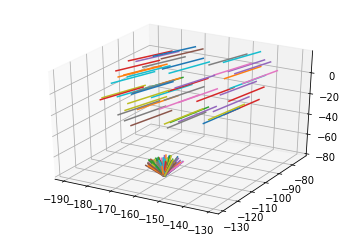

In [4]:
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.5,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(100,sourcepoints, sourcethet,origin10)
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range(len(Rays)):
    Ri = Rays[i]
    xi,yi,zi = ML(Rays[i][2],Rays[i][3],20)
    pl3dsurf.plot(xi,yi,zi)
    Ray1 = ReflEll(Ri,thet10,origin10,coeffellipse7,center10,range10)
    if Ray1 is not None:
        #print(Ray1)
        x,y,z = ML(Ray1[2],Ray1[3],20)
        pl3dsurf.plot(x,y,z)
pl.show()


Now incorporate it into the ####io functions (io: input output only)

In [5]:
#give in global, does all work switching between locals, returns in global
def TTTTio(Ri,p1,p2,p3,p4):
    Ray1 = ReflEll(Ri,thet10,origin10,coeffellipse7,center10,range10)
    Ray_TP1 = IntPolT2(Ray1,coeffpolar,originpolar1,p1) #P1
    Ray_E8 = ReflEll(Ray_TP1,thet6,origin8,coeffellipse56,center8,range8) #E8
    Ray_TP2 = IntPolT2(Ray_E8,coeffpolar,originpolar2,p2) #P2
    Ray_E3 = ReflEll(Ray_TP2,thet,origin3,coeffellipse,center3,range3) #E3
    Ray_M0 = IntM2(Ray_E3, coeffmirr, originG) #off mirror
    Ray_E4 = ReflEll(Ray_M0, thet,origin4,coeffellipse,center4,range4) #off E4
    Ray_TP3 = IntPolT2(Ray_E4,coeffpolar,originpolar3,p3) #P3
    Ray_E5 = ReflEll(Ray_TP3, thet5,origin5,coeffellipse56,center5,range5)
    Ray_TP4 = IntPolT2(Ray_E5,coeffpolar,originpolar4,p4)
    Ray_E72 = ReflEll(Ray_TP4,thet7,origin7,coeffellipse7,center7,range7)
    return Ray_E72

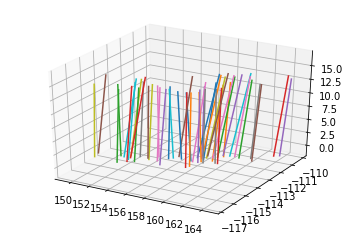

In [6]:
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.5,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(100,sourcepoints, sourcethet,origin10)
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range(len(Rays)):
    Ri = Rays[i]
    xi,yi,zi = ML(Ri[2],Ri[3],20)
    #pl3dsurf.plot(xi,yi,zi)
    Tattempt = TTTTio(Ri,p1,p2,p3,p4)
    if Tattempt is not None:
        xo,yo,zo = ML(Tattempt[2],Tattempt[3],20)
        pl3dsurf.plot(xo,yo,zo)
pl.show()

Clearly, above the output is much more spread out than the input so, now try with ONE POINT source (at the exact focus) and see if it works?

In [7]:
def specsource(r,origin,thet):
    if r ==0.0:
        return origin
    x,y,z=circularsource(r)
    x1,y1,z1 = transformLG(x,y,z,origin,thet)
    sourcepoint = [x1,y1,z1]
    return sourcepoint

In [8]:
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.0,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(100,sourcepoints, sourcethet,origin10)

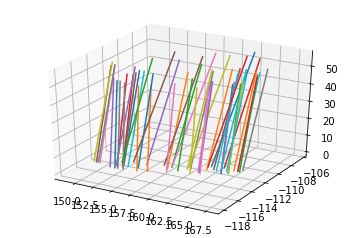

In [9]:
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range(len(Rays)):
    Ri = Rays[i]
    xi,yi,zi = ML(Ri[2],Ri[3],20)
    #pl3dsurf.plot(xi,yi,zi)
    Tattempt = TTTTio(Ri,p1,p2,p3,p4)
    if Tattempt is not None:
        xo,yo,zo = ML(Tattempt[2],Tattempt[3],80)
        pl3dsurf.plot(xo,yo,zo)
pl.show()

okay... gonna try it step by step because the above should be ONE POINT. so there must be some mistake somewhere???? honestly not sure where
Follow 1 ray through

In [10]:
def PLINTzS(z,p,v):
    t = (z - p[2])/v[2]
    xi = p[0] + t*v[0]
    yi = p[1] + t*v[1]
    point =[xi,yi,z]
    return point
def TTTTioTEST(Ri,p1,p2,p3,p4):
    Ray1 = ReflEll(Ri,thet10,origin10,coeffellipse7,center10,range10)
    Ray_TP1 = IntPolT2(Ray1,coeffpolar,originpolar1,p1) #P1
    Ray_E8 = ReflEll(Ray_TP1,thet6,origin8,coeffellipse56,center8,range8) #E8
    Ray_TP2 = IntPolT2(Ray_E8,coeffpolar,originpolar2,p2) #P2
    Ray_E3 = ReflEll(Ray_TP2,thet,origin3,coeffellipse,center3,range3) #E3
    Ray_M0 = IntM2(Ray_E3, coeffmirr, originG) #off mirror
    Ray_E4 = ReflEll(Ray_M0, thet,origin4,coeffellipse,center4,range4) #off E4
    Ray_TP3 = IntPolT2(Ray_E4,coeffpolar,originpolar3,p3) #P3
    Ray_E5 = ReflEll(Ray_TP3, thet5,origin5,coeffellipse56,center5,range5)
    Ray_TP4 = IntPolT2(Ray_E5,coeffpolar,originpolar4,p4)
    Ray_E72 = ReflEll(Ray_TP4,thet7,origin7,coeffellipse7,center7,range7)
    return Ray1,Ray_TP1,Ray_E8,Ray_TP2,Ray_E3,Ray_M0,Ray_E4,Ray_TP3,Ray_E5,Ray_TP4,Ray_E72

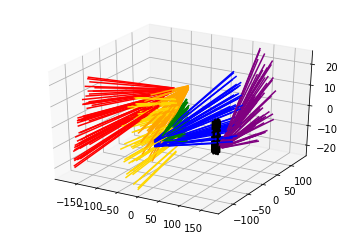

In [11]:
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.0,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(100,sourcepoints, sourcethet,origin10)
pl3dsurf = pl.figure().gca(projection = '3d')
vF = [] #final exit points
vI=[] # original source points
v7 = [] #intersection with E7
for i in range(len(Rays)):
    Ri = Rays[i]
    vI.append(Ri[2])
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = TTTTioTEST(Ri,p1,p2,p3,p4)
    if a11 is not None:
        x,y,z = ML(a1[2],a1[3],200)
        x1,y1,z1 = ML(a3[2],a3[3],200)
        x2,y2,z2 = ML(a5[2],a5[3],100)
        x3,y3,z3 = ML(a6[2],a6[3],100)
        x4,y4,z4 = ML(a7[2],a7[3],200)
        x5,y5,z5 = ML(a9[2],a9[3],230)
        x6,y6,z6 = ML(a11[2],a11[3],20)
        pl3dsurf.plot(x,y,z, color = 'red')
        pl3dsurf.plot(x1,y1,z1, color = 'orange')
        pl3dsurf.plot(x2,y2,z2, color = 'gold')
        pl3dsurf.plot(x3,y3,z3, color = 'green')
        pl3dsurf.plot(x4,y4,z4, color = 'blue')
        pl3dsurf.plot(x5,y5,z5, color = 'purple')
        pl3dsurf.plot(x6,y6,z6, color = 'black')
        xp,yp,zp = PLINTzS(80,a11[2],a11[3])
        vi = [xp,yp,zp]
        vF.append(vi)
        v7.append(a11[2])
pl.show()

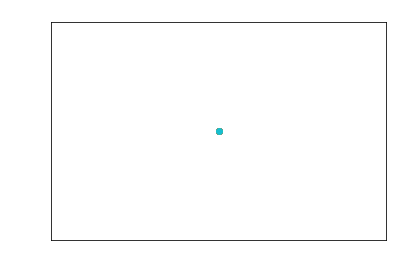

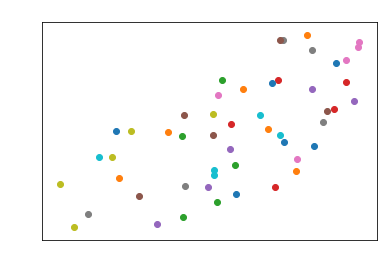

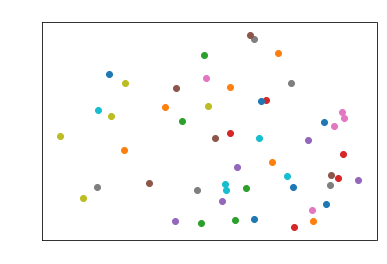

In [12]:
#ORIGINAL source point
for i in range(len(vI)):
    pl.scatter(vI[i][0],vI[i][1])
pl.title('original source point', color = 'white')
pl.tick_params(colors='white')
pl.show()

for i in range(len(v7)):
    pl.scatter(v7[i][0],v7[i][1])
pl.title('Int with E7', color = 'white')
pl.tick_params(colors='white')
pl.show()

for i in range(len(vF)):
    pl.scatter(vF[i][0],vF[i][1])
pl.title('Int at z = 80', color = 'white')
pl.tick_params(colors='white')
pl.show()
pl.savefig('differences')


GO THROUGH LAYOUT AND CALCULATE, OR WAIT AND SPEAK TO STEVE (AKA IGNORE)

sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.0,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(20,sourcepoints, sourcethet,origin10)
for i in range(len(Rays)):
    Ri = Rays[i]
    Ray1 = ReflEll(Ri,thet10,origin10,coeffellipse7,center10,range10)
    xi,yi,zi = ML(Ri[2],Ri[3],80)
    

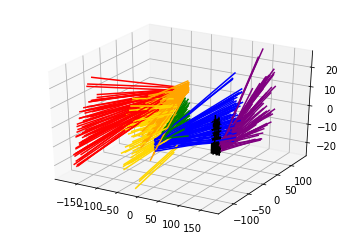

In [13]:
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.79375,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(100,sourcepoints, sourcethet,origin10)
pl3dsurf = pl.figure().gca(projection = '3d')
vF = [] #final exit points
vI=[] # original source points
v7 = [] #intersection with E7
for i in range(len(Rays)):
    Ri = Rays[i]
    vI.append(Ri[2])
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = TTTTioTEST(Ri,p1,p2,p3,p4)
    if a11 is not None:
        x,y,z = ML(a1[2],a1[3],200)
        x1,y1,z1 = ML(a3[2],a3[3],200)
        x2,y2,z2 = ML(a5[2],a5[3],100)
        x3,y3,z3 = ML(a6[2],a6[3],100)
        x4,y4,z4 = ML(a7[2],a7[3],200)
        x5,y5,z5 = ML(a9[2],a9[3],230)
        x6,y6,z6 = ML(a11[2],a11[3],20)
        pl3dsurf.plot(x,y,z, color = 'red')
        pl3dsurf.plot(x1,y1,z1, color = 'orange')
        pl3dsurf.plot(x2,y2,z2, color = 'gold')
        pl3dsurf.plot(x3,y3,z3, color = 'green')
        pl3dsurf.plot(x4,y4,z4, color = 'blue')
        pl3dsurf.plot(x5,y5,z5, color = 'purple')
        pl3dsurf.plot(x6,y6,z6, color = 'black')
        xp,yp,zp = PLINTzS(80,a11[2],a11[3])
        vi = [xp,yp,zp]
        vF.append(vi)
        v7.append(a11[2])
pl.show()

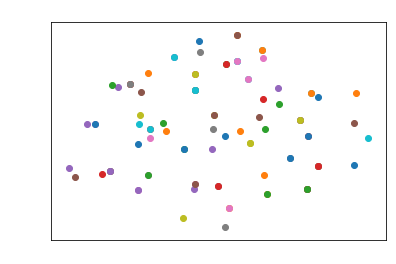

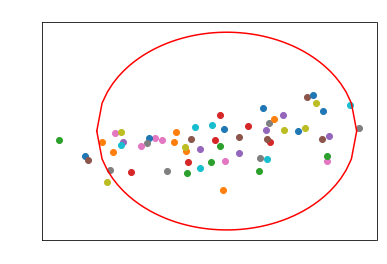

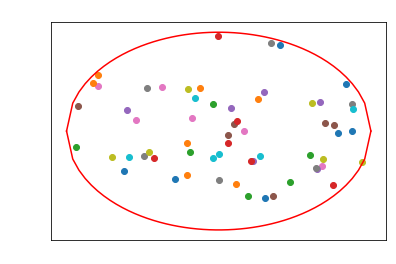

In [14]:
#changed source point (so not oNE POINT)
for i in range(len(vI)):
    pl.scatter(vI[i][0],vI[i][1])
pl.title('original source point', color = 'white')
pl.tick_params(colors='white')
pl.show()

for i in range(len(v7)):
    pl.scatter(v7[i][0],v7[i][1])
pl.title('Int with E7', color = 'white')
x,yp,yn = circle([158,-113],8)
pl.plot(x,yp, color = 'red')
pl.plot(x,yn, color = 'red')
pl.tick_params(colors='white')
pl.show()

for i in range(len(vF)):
    pl.scatter(vF[i][0],vF[i][1])
pl.title('Int at z = 80', color = 'white')
x,yp,yn = circle([160,-113],9)
pl.plot(x,yp, color = 'red')
pl.plot(x,yn, color = 'red')
pl.tick_params(colors='white')
pl.show()
pl.savefig('differences')


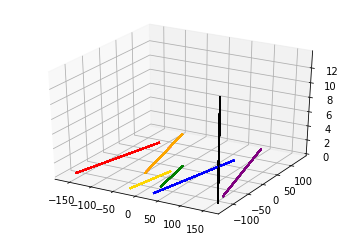

In [15]:
#2d rays (so flat initial line)
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.0001,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(100,sourcepoints, sourcethet,origin10)
pl3dsurf = pl.figure().gca(projection = '3d')
vF = [] #final exit points
vI=[] # original source points
v7 = [] #intersection with E7
for i in range(len(Rays)):
    Ri = Rays[i]
    Ri[3][0]=0.000001
    Ri[3][1] = 0.000001
    Ri[3][2]=1
    vI.append(Ri[2])
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = TTTTioTEST(Ri,p1,p2,p3,p4)
    if a11 is not None:
        x,y,z = ML(a1[2],a1[3],200)
        x1,y1,z1 = ML(a3[2],a3[3],200)
        x2,y2,z2 = ML(a5[2],a5[3],100)
        x3,y3,z3 = ML(a6[2],a6[3],100)
        x4,y4,z4 = ML(a7[2],a7[3],200)
        x5,y5,z5 = ML(a9[2],a9[3],230)
        x6,y6,z6 = ML(a11[2],a11[3],20)
        pl3dsurf.plot(x,y,z, color = 'red')
        pl3dsurf.plot(x1,y1,z1, color = 'orange')
        pl3dsurf.plot(x2,y2,z2, color = 'gold')
        pl3dsurf.plot(x3,y3,z3, color = 'green')
        pl3dsurf.plot(x4,y4,z4, color = 'blue')
        pl3dsurf.plot(x5,y5,z5, color = 'purple')
        pl3dsurf.plot(x6,y6,z6, color = 'black')
        xp,yp,zp = PLINTzS(80,a11[2],a11[3])
        vi = [xp,yp,zp]
        vF.append(vi)
        v7.append(a11[2])
pl.show()

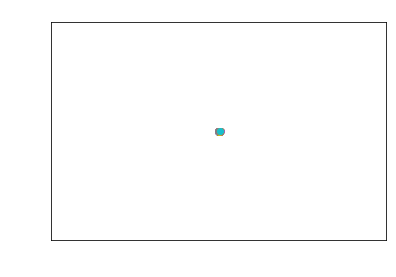

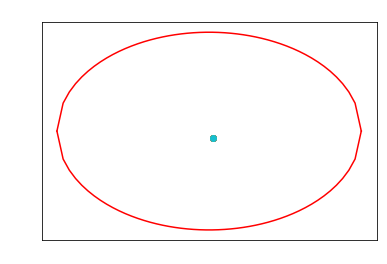

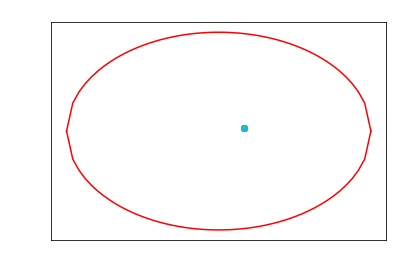

In [17]:
#changed source point (so not oNE POINT)
for i in range(len(vI)):
    pl.scatter(vI[i][0],vI[i][1])
pl.title('original source point', color = 'white')
pl.tick_params(colors='white')
pl.show()

for i in range(len(v7)):
    pl.scatter(v7[i][0],v7[i][1])
pl.title('Int with E7', color = 'white')
x,yp,yn = circle([158,-113],8)
pl.plot(x,yp, color = 'red')
pl.plot(x,yn, color = 'red')
pl.tick_params(colors='white')
pl.show()

for i in range(len(vF)):
    pl.scatter(vF[i][0],vF[i][1])
pl.title('Int at z = 80', color = 'white')
x,yp,yn = circle([160,-113],9)
pl.plot(x,yp, color = 'red')
pl.plot(x,yn, color = 'red')
pl.tick_params(colors='white')
pl.show()
pl.savefig('differences')
#SO IT'S WORKING THE WAY IT'S SUPPOSED TO?
#this is when the Z component of the ray's VECTOR is zero.